<font color='green'> 
**Youtube - Aladdin Persson Kanalı - TensorFlow 2.0 Beginner Tutorials serisi**
    
TensorFlow Tutorial 11 - Transfer Learning, Fine Tuning and TensorFlow Hub - Aladdin Persson anlattı.
</font>

**Video**: [TensorFlow Tutorial 11 - Transfer Learning, Fine Tuning and TensorFlow Hub](https://www.youtube.com/watch?v=WJZoywOG1cs&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=11)

### İçindekiler

**Pretrained Model**
* Loading and preprocessing mnist dataset
* Loading pretrained model
* Creating our model
* Training configuration with model.compile()
* Training with model.fit()

**Pretrained Keras Model**
* Creating our own dataset
* Loading pretrained model
* Creating our model
* Training configuration with model.compile()
* Training with model.fit()

**Pretrained Hub Model**
* Creating our own dataset
* Loading pretrained model
* Creating our model
* Training configuration with model.compile()
* Training with model.fit()


### <font color="blue"> Giriş</font>

Bu notebookta pretrained modelleri nasılı kullandığımızı (layerları dondurma, fine-tuning yapma vs.) göreceğiz.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub

### 1. Pretrained Model

Daha önce kendi kaydettiğimiz (bir önceki save-load notebookundan bakabilirsin) bir model olursa bu yöntemi kullanıyoruz. Bu model kendi modelimiz de olabilir githubdan vs. aldığımız bir model de olabilirdi.  

#### <font color="green"> Loading and preprocessing mnist dataset</font>

In [39]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

11501568/11490434 [==============================] - 0s 0us/step


#### <font color="green"> Loading pretrained model</font>

##### Jupyter Notebookta Çalıştırmak İçin 

**Not**: tensorflow_hub'ı import ederken `cannot import name 'MomentumParameters' from 'tensorflow.python.tpu.tpu_embedding' (C:\Users\aa\anaconda\lib\site-packages\tensorflow\python\tpu\tpu_embedding.py)` hatası aldığım ve çözemediğim için jupyterde çalıştıramadım.

*Udacity-Intro to Deep Learning with PyTorch* dokümanlarında yer alan mnist_mlp notebookunu colabde çalıştırıp oradaki modeli kaydettim ve o kaydettiğim modeli burada yükledim. Modeli kaydederken kodu aşağıdaki şekilde yazmıştım.

```
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)")
model.save('saved_mnist/')
```




Bu modeli bilgisayarımda 11. TensorFlow Tutorial 11 Transfer Learning, Fine Tuning and TensorFlow Hub klasörüne indirip yükleme işlemini gerçekleştirdim.

In [ ]:
model = keras.models.load_model('11. TensorFlow Tutorial 11 Transfer Learning, Fine Tuning and TensorFlow Hub/saved_mnist/')

##### Colab'de Çalıştırmak İçin

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/Personal Studies/Artificial Intelligence/Tensorflow Tutorial 2.0 Beginner Tutorials (Youtube - Aladdin Persson)")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
model = keras.models.load_model('saved_mnist/')

#### <font color="green"> Creating our model</font>

Başta `model.trainable=False` demeden eğittik.

##### `model.trainable=False`

Pretrained modellerde tüm modeli alıp eğitmeyiz. Pretrained modeldeki layerları dondururuz. Bunu yapmak için `model.trainable=False` kodunu yazarız. 

In [61]:
model.trainable = False # bu modelimizi daha hızlı eğitmemizi sağlıyor aynı zamanda.

> Layerlarda değişiklik yapmak istersek iterate de edebiliyoruz. Aşağıdaki kod yukarıdaki `model.trainable = False` koduyla aynı işlemi gerçekleştiriyor.
  ```
  for layer in model.layers:
      assert layer.trainable == False
      layer.trainable = False
      ...
  ```


##### Devam

In [55]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

`print(model.summary())` ile modelin hangi parçasını istediğini kontrol edebilirsin. Eğer tüm modeli istiyorsan traininge devam edebilirsin. Ama normalde transfer learning yaparken layerların bir kısmını seçeriz. Diyelim ki class sayımız 1000 ImageNet veya başka bir şey olabilir. Mnistte 10 classımız var. Bu yüzden son dense layer için kendi layerımızı kullanabiliriz ama diğer layerları load ettiğimiz modelden alabiliriz.

Videodaki adamın kullandığı model:

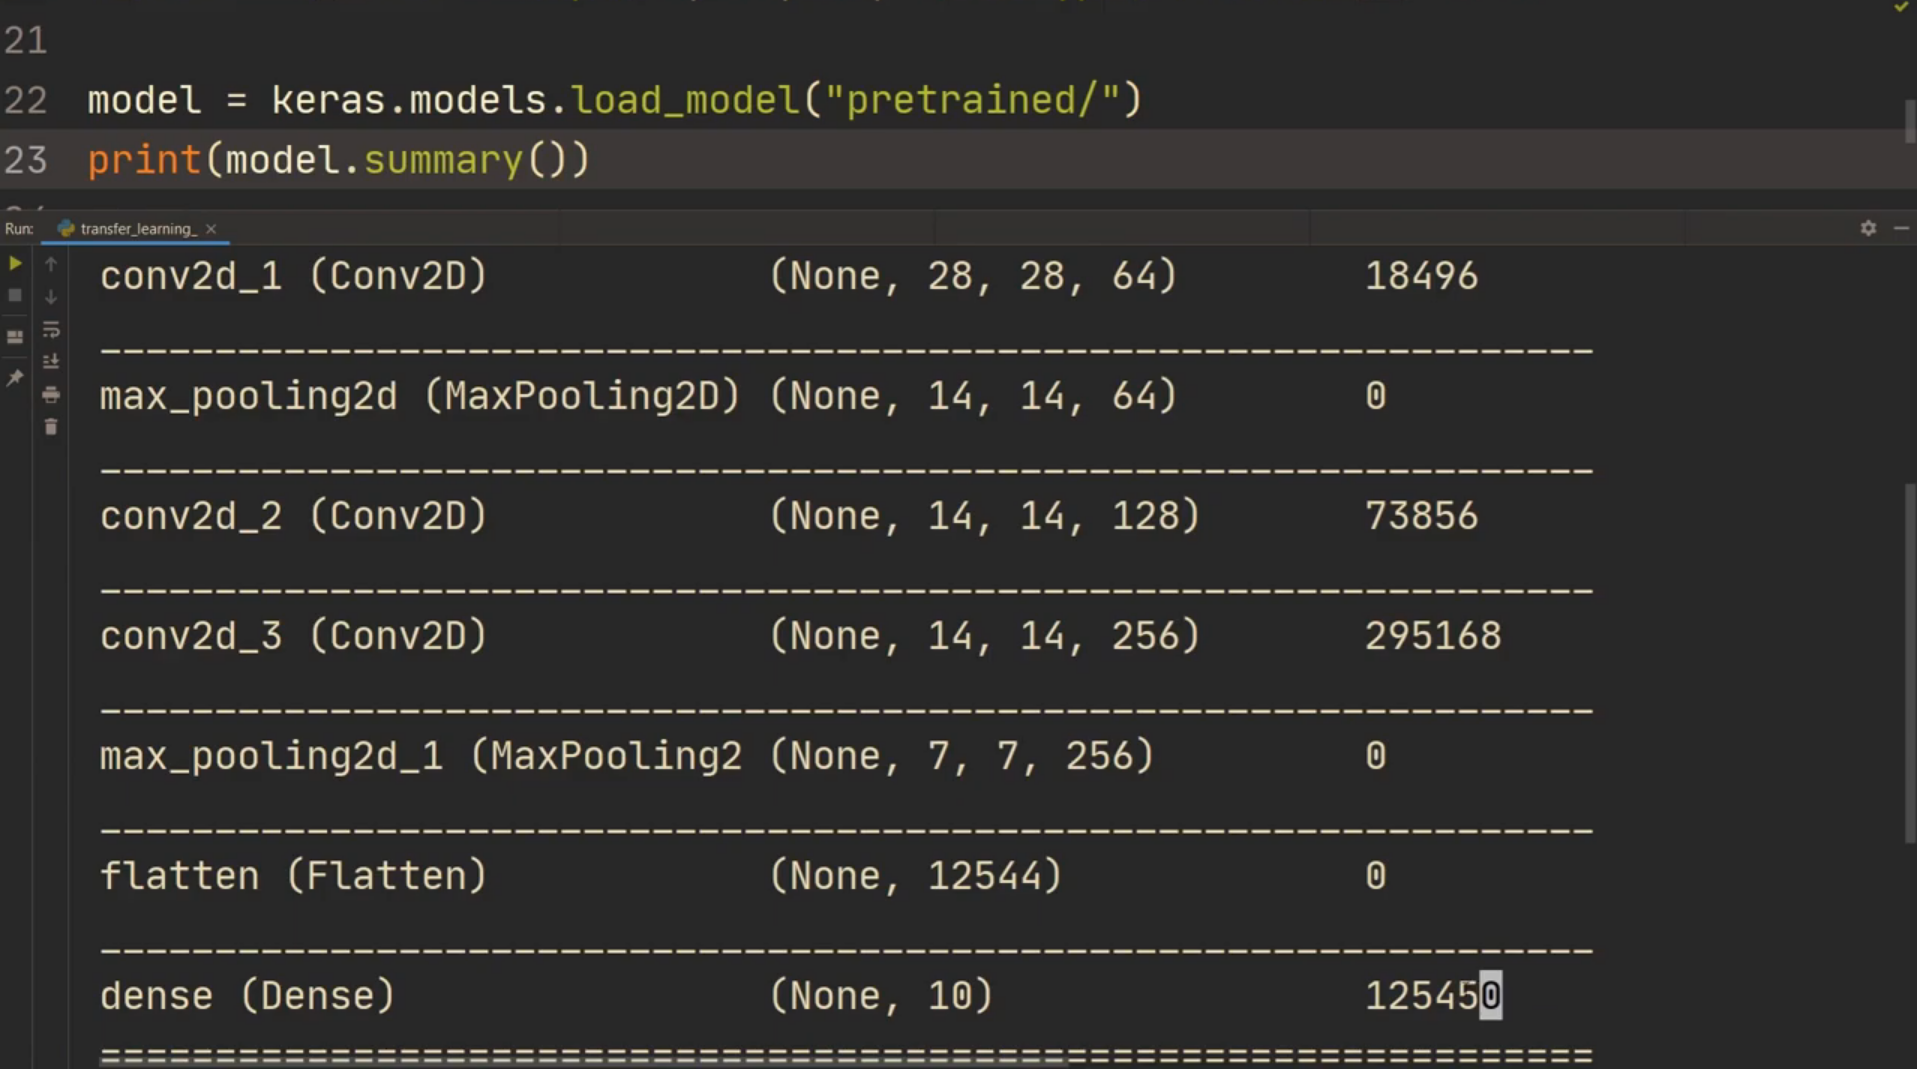

In [62]:
base_inputs = model.layers[0].input # ilk layerı alıyoruz. 
base_outputs = model.layers[0].output # videodaki örnekte burası -2'ydi.
final_outputs = layers.Dense(10)(base_outputs)

`base_outputs = model.layers[0].output` pretrained modelimizi base model olarak kullanacağız o yüzden bunu "base_outputs" olarak isimlendirdik. Flatten layerın outputunu alacağız. Bunun üstüne kendi dense layerımızı ekleyeceğiz. Yani dense layerı kaldırmışız gibi düşünebilirsin. Bizim flatten layerımız baştan sayarsak 1. indekste videodaki pretrained modelde 7. sıradaydı. Tersten de sayabiliriz. Benim modelimde dropoutlar da vardı ama `final_output = layers.Dense(10)(base_outputs)` kodu ile sadece Dense layer ekledim. 

In [63]:
new_model = keras.Model(inputs=base_inputs, outputs=final_outputs)

In [64]:
print(new_model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (InputLayer)   [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


#### <font color="green"> Training configuration with `model.compile()` </font>

In [65]:
new_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

#### <font color="green"> Training with `model.fit()`  </font>

In [66]:
new_model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=1)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4675 - accuracy: 0.8770
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9204


### 2. Pretrained Keras Model

Kerasın kendi içinde önceden eğitilmiş modeller var onları import edebilirsin. [Burada](https://www.tensorflow.org/api_docs/python/tf/keras/applications) görebilirsin modelleri. 

#### <font color="green">Creating our own dataset</font>

In [2]:
x = tf.random.normal(shape=(5, 299, 299, 3)) # fit edeceğimiz modele uygun bir shape yazdık.
y = tf.constant([0, 1, 0, 0, 1]) # 5 resmimiz var demiştik 5 tane de y değeri olacak bu durumda.

#### <font color="green"> Loading pretrained model</font>

In [3]:
model = keras.applications.InceptionV3(include_top=True)

`include_top=True`yu False yaparsak `avg_pool (GlobalAveragePooling2)`(flatten) ve predictions (Dense) layerını almıyor. 

In [ ]:
print(model.summary())

#### <font color="green"> Creating our model</font>

In [5]:
base_inputs = model.layers[0].input
base_outputs = model.layers[-2].output # son fully connected layerı kaldırmış olduk. 
final_outputs = layers.Dense(5)(base_outputs)

`base_outputs = model.layers[-2].output` kodu ile son fully connected layerı kaldırmış olduk ama birden fazla fully connected layer olabilirdi onları hepsini listeye yazmamız gerekirdi bu durumda. 

In [6]:
new_model = keras.Model(inputs=base_inputs, outputs=final_outputs)

#### <font color="green"> Training configuration with `model.compile()` </font>

In [7]:
new_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

#### <font color="green"> Training with `model.fit()`  </font>

Kendi oluşturduğumuz data setini kullanıyoruz. 

In [8]:
new_model.fit(x, y, epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 1.6872 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 0.2707 - accuracy: 1.0000
Epoch 3/15
1/1 [==============================] - 4s 4s/step - loss: 0.2328 - accuracy: 1.0000
Epoch 4/15
1/1 [==============================] - 4s 4s/step - loss: 0.0395 - accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 4s 4s/step - loss: 5.8362e-05 - accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 4s 4s/step - loss: 4.6108e-05 - accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 3.7097e-05 - accuracy: 1.0000
Epoch 8/15
1/1 [==============================] - 4s 4s/step - loss: 3.1327e-05 - accuracy: 1.0000
Epoch 9/15
1/1 [==============================] - 4s 4s/step - loss: 2.7775e-05 - accuracy: 1.0000
Epoch 10/15
1/1 [==============================] - 4s 4s/step - loss: 2.5081e-05 - accuracy: 1.0000
Epoch 11/15
1/1 [======

### 3. Pretrained Hub Model

Tensorflow Hub'ın içinde önceden eğitilmiş modeller var onlardan birini yükleyeceğiz.

[TensorFlow Hub](https://tfhub.dev/) sitesinde fotoğraf, video, text için farklı farklı modeller bulabilirsin. Biz burada feature vector kısmından seçtiğimiz [imagenet/inception_v3/feature_vector](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5) kullanacağız tekrar. Bu modeli kerastaki top_equals = False demiş halimiz olarak düşünebilirsin. Bize feature vectorü veriyor. Fully connected layerın üstündeki feature vectorü alıyoruz yani. Siteye girdiğimizde turuncu şekilde yazılı "Copy URL" butonuna tıklıyoruz ve bunu aşağıda yazdığımız `url` değişkenine yapıştırıyoruz.

#### <font color="green">Creating our own dataset</font>

In [14]:
x = tf.random.normal(shape=(5,299,299,3)) # inception v3'teki resimlerin boyutu 299x299x3 olduğu için biz de bu şekilde yazdık. 
y = tf.constant([0, 1, 0, 0, 1])

url = 'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5'

#### <font color="green"> Loading pretrained model</font>

In [15]:
base_model = hub.KerasLayer(url, input_shape=(299,299,3))

In [16]:
base_model.trainable = False # fine-tuning yaptığımız için bu şekilde False dedik.

#### <font color="green"> Creating our model</font>

In [17]:
model = keras.Sequential([
   base_model,
   layers.Dense(128, activation='relu'), # fully connected layerımız yoktu istediğimiz sayıda dense layer ekleyebiliriz. 
   layers.Dense(64, activation='relu'),
   layers.Dense(5),
])

#### <font color="green"> Training configuration with `model.compile()` </font>

In [18]:
new_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

#### <font color="green"> Training with `model.fit()`  </font>

In [19]:
new_model.fit(x, y, epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 8.9775 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 0.0083 - accuracy: 1.0000
Epoch 3/15
1/1 [==============================] - 4s 4s/step - loss: 0.0198 - accuracy: 1.0000
Epoch 4/15
1/1 [==============================] - 4s 4s/step - loss: 0.1788 - accuracy: 0.8000
Epoch 5/15
1/1 [==============================] - 4s 4s/step - loss: 5.9447e-04 - accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 4s 4s/step - loss: 0.0093 - accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 0.0104 - accuracy: 1.0000
Epoch 8/15
1/1 [==============================] - 4s 4s/step - loss: 0.0033 - accuracy: 1.0000
Epoch 9/15
1/1 [==============================] - 4s 4s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/15
1/1 [==============================] - 4s 4s/step - loss: 6.3896e-04 - accuracy: 1.0000
Epoch 11/15
1/1 [======================